In [5]:
# !pip install opencv-python
# !pip install matplotlib

평균밝기: 126.74230395962734
이미지가 어둡습니다.


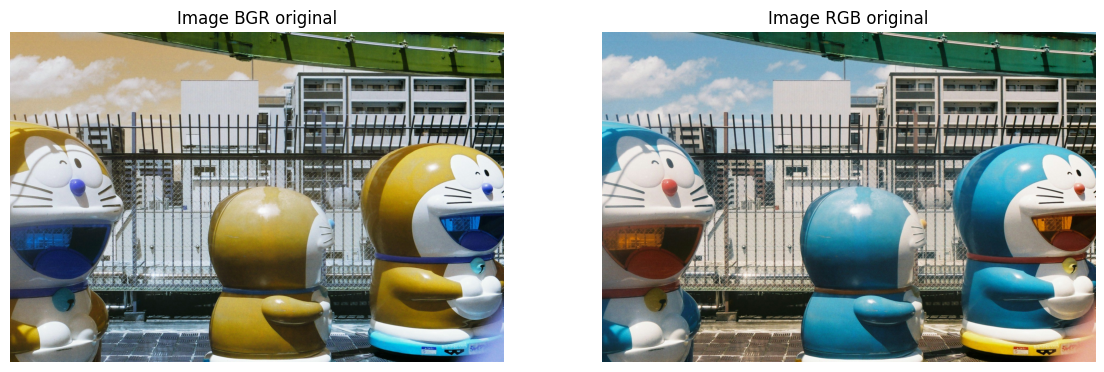

In [18]:
import numpy as np
import cv2 # BGR -> RGB 
import matplotlib.pyplot as plt

# 1. numpy로 이미지 생성
# img = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)
img = cv2.imread('.\\Note_s3\\sample.jpg')

# 그레이스케일로 변환 (색상 -> 밝기)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mean_B = np.mean(gray)

print("평균밝기:",mean_B)

if mean_B < 127:
    print("이미지가 어둡습니다.")
elif mean_B > 220:
    print("이미지가 밝습니다.")
else:
    print("이미지가 정상입니다.")


plt.figure(figsize=(14,10))
plt.subplot(1, 2, 1)
plt.title("Image BGR original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Image RGB original")
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

 ### H - Hue (색상)
색의 종류를 의미 (빨강, 파랑, 초록 등) <br/>
단위: 도(degree), 범위: 0 ~ 179 (OpenCV 기준, 원래는 0~360도지만 OpenCV는 180단계로 줄임) 즉, 2로 나눔<br/>
예시: 빨강: 0 또는 179 부근 (양 끝)
- 노랑: 30
- 초록: 60
- 하늘: 90
- 파랑: 120
- 보라: 150
 ### S - Saturation (채도)
색의 선명함 또는 순수한 색인지의 정도<br/>
범위: 0 ~ 255
- 값이 낮을수록 회색에 가까운 색 (탁한 색)
- 값이 높을수록 원색에 가까운 진한 색
 ### V - Value (명도)
색의 밝기<br/>
범위: 0 ~ 255
- 값이 0이면 완전한 검정
- 값이 255면 가장 밝은 상태

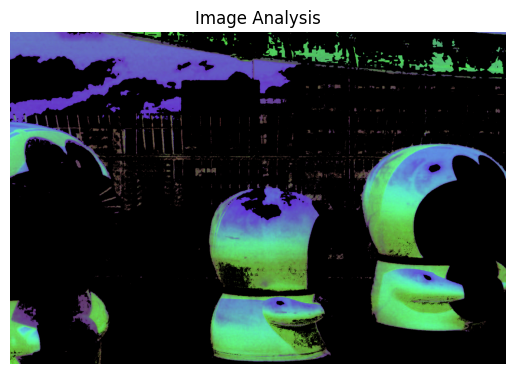

In [12]:
# 1. numpy로 이미지 생성
# img = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)

# 2. BGR -> HSV 색공간 변환
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 3. 파란색 범위지정(HSV)
lower_blue = np.array([80, 50, 50])
upper_blue = np.array([140, 255, 255])

# 4. 파란색 부분만 추출
mask = cv2.inRange(hsv_img,lower_blue,upper_blue)

# 5. 원본 이미지에서 파란색 추출 마스크를 적용
blue_img = cv2.bitwise_and(hsv_img, hsv_img, mask=mask )

plt.imshow(blue_img)
plt.title("Image Analysis")
plt.axis("off")
plt.show()

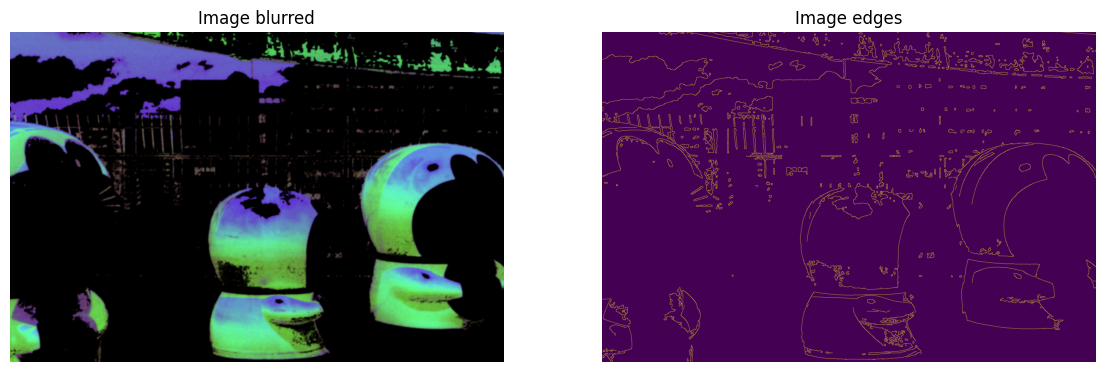

In [15]:
blurred = cv2.GaussianBlur(blue_img, (9,9), 0) # 홀수만 입력 
edges = cv2.Canny(blurred, 50 , 150)

plt.figure(figsize=(14,20))
plt.subplot(1, 2, 1)
plt.title("Image blurred")
plt.imshow(blurred)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Image edges")
plt.imshow(edges)
plt.axis("off")
plt.show()